In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from os import listdir
import re

import scipy.integrate as integrate

matplotlib.rcParams.update({'font.size': 14})

# Physical constants
c = 3 * 10 ** 8
hbar = 6.6 * 10 ** -16 # eV * s
hbar = hbar * 10 ** -9 # GeV * s

# Minkowski Metric
eta = np.diag([1,-1,-1,-1])

In [2]:
# PDG Values

m_pi0 = 0.135 # GeV
m_eta = 0.548 # GeV
m_KL  = 0.497 # GeV
m_D   = 1.865 # GeV
m_b   = 4.180 # GeV
m_B   = 5.280 # GeV
m_mu  = 105.6583755 * 10 ** -3 # GeV
v     = 246 # GeV

tau_D = 4.101 * 10**-13 # s
tau_B = 1.519 * 10**-12 # s
tau_KL = 5.116 * 10**-8 # s
tau_eta = 5.04 * 10**-19 # s (Inverting width in PDG)
tau_pi0 = 8.43 * 10**-17 # s

# Branching ratios to invisible from various experiments

Br_pi0 = 10**-7   # 1409.2288
Br_KL  = 10**-4   # 1409.2288
Br_eta = 10**-4   # 1409.2288
Br_D   = 10**-5   # 1206.2543
Br_B   = 10**-5   # 1808.10567

### FASER [[1901.04468]](https://arxiv.org/pdf/1901.04468.pdf):

Length to Detector: 480 m \
Decay Volume in Length: 1.5 m \
Decay Volume in Radius: 0.1 m

### FASER2 [[2109.10905]](https://arxiv.org/pdf/2109.10905.pdf):

Length to Detector: 480 m \
Decay Volume in Length: 5 m \
Decay Volume in Radius: 1 m

In [3]:
L_FASER = 480
Delta_FASER = 1.5
R_FASER = 0.1
theta_FASER = R_FASER / L_FASER

L_FASER2 = 480
Delta_FASER2 = 5
R_FASER2 = 1
theta_FASER2 = R_FASER2 / L_FASER2

In [4]:
# Benchmark values from p = 1 TeV, theta = 10 ** -4

N_pi0 = 10**14
N_KL = 10**14
N_eta = 10**13
N_D = 10**11
N_B = 10**10

In [5]:
# Dictionary of above values for easy indexing/lookup

meson_dict = {}
meson_dict['$B_0$']   = {'m' : m_B,   'tau' : tau_B,   'N' : N_B,   'Br' : Br_B}
meson_dict['$D_0$']   = {'m' : m_D,   'tau' : tau_D,   'N' : N_D,   'Br' : Br_D}
# meson_dict['$K_L$']   = {'m' : m_KL,  'tau' : tau_KL,  'N' : N_KL,  'Br' : Br_KL}
meson_dict['$\eta$']  = {'m' : m_eta, 'tau' : tau_eta, 'N' : N_eta, 'Br' : Br_eta}
meson_dict['$\pi_0$'] = {'m' : m_pi0, 'tau' : tau_pi0, 'N' : N_pi0, 'Br' : Br_pi0}

In [6]:
# Import Reuven's CHARM and LHCb bounds

cur_dir = 'B_bounds/'
ls = listdir(cur_dir)

B_constr = {}
for fname in [fname for fname in ls if re.search('\.csv',fname)]:
    args = re.search('^([a-z|A-Z]*)_([0-9]*)',fname)
    exp = args[1]
    mass = float(args[2]) * 10 ** -3
    
    data = np.loadtxt(cur_dir + fname)
    energies = data[:,0]
    bounds = data[:,1]
    
    if not(str(mass) in B_constr.keys()):
        B_constr[str(mass)] = {}
    
    B_constr[str(mass)][exp] = {
        'E'  : energies,
        'Br' : bounds
    }

The following plot estimates the sensitivy of FASER in the ctau vs Br parameter space for various neutral meson decays. We previously decided this was not very useful.

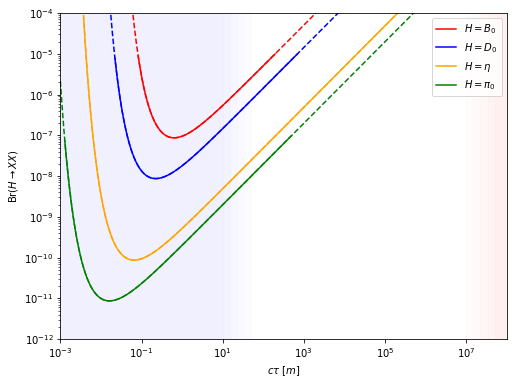

In [7]:
m_X   = 1     # GeV
p_X   = 10**3 # GeV

# Probability to decay in FASER
#    x = (m/p) * (L/ct)
#    missing factor of Delta / L
prob = lambda x : x * np.exp(-x)

ctaus = np.logspace(-3,8,500)
# Make nice axes for plotting
fig = plt.figure(figsize=(8,6))
# fig, axs = plt.subplots(2,2,sharex=True, sharey=True, gridspec_kw={'wspace' : 0, 'hspace' : 0}, figsize=(8,8));

colors = ['red', 'blue', 'orange', 'green']
# Calculate ctau vs Br line and plot for each Hadron
for (meson, color) in zip(meson_dict, colors):
    m_X = meson_dict[meson]['m'] / 4
    N   = meson_dict[meson]['N']
    Br  = meson_dict[meson]['Br']
    
    probs = prob( (m_X / p_X) * (L_FASER / ctaus) )
#     probs = prob(L/ctaus)
    mask = probs > 10 ** -10
    Br_mins = (L_FASER / Delta_FASER) / N * ( probs[mask] ** -1 )
    mask_br = Br_mins < Br
    
    plt.plot(ctaus[mask], Br_mins, '--', color = color)
    plt.plot(ctaus[mask][mask_br], Br_mins[mask_br], color = color, label='$H=$' + meson)

# Fading backgrounds for main detector and BBN
for N in range(0, 5):
    x = 1.5**N
    plt.fill_between([0,x*10],[1,1], color='b', alpha=0.01)
    plt.fill_between([10**7*x, 10**9],[1,1], color='r', alpha=0.01)
plt.xlim([10**-3, 10**8])
# plt.xlim([0.5, 2.5])
plt.ylim([10**-12, 10**-4])
plt.xlabel('$c\\tau~[m]$')
plt.ylabel('Br($H\\rightarrow XX$)')
plt.xscale('log')
plt.yscale('log')
plt.legend();

fig.savefig('Plots/FASER_Br_ct.pdf')

The following plot is deprecated - replaced by code in `Full Calculation.ipynb`.

In [ ]:
p_X   = 10**3 # GeV

# Probability to decay in FASER
#    x = (m/p) * (L/ct)
#    missing factor of Delta / L
prob = lambda x : x * np.exp(-x)

ctaus = np.logspace(-3,8,500)
# Make nice axes for plotting
# fig = plt.figure(figsize=(8,6))
fig, axs = plt.subplots(2,2,sharex=True, sharey=True, gridspec_kw={'wspace' : 0.05, 'hspace' : 0.15}, figsize=(24,12));

m_Xs = [float(m_X) for m_X in B_constr.keys()]
m_Xs = np.sort(m_Xs)
for (m_X, ax) in zip(m_Xs,axs.reshape(np.size(axs),)):

    # Calculate ctau vs Br line and plot for each Hadron
    for meson in meson_dict:
        if meson == '$B_0$':
            N   = meson_dict[meson]['N']
            Br  = meson_dict[meson]['Br']

            probs = prob( (m_X / p_X) * (L_FASER / ctaus) )
        #     probs = prob(L/ctaus)
            mask = probs > 10 ** -10
            Br_mins = (L_FASER / Delta_FASER) / (N/20) * ( 3 * probs[mask] ** -1 )
            mask_br = Br_mins < Br

    #         plt.plot(ctaus[mask], Br_mins, '--', color = color)
    #         plt.plot(ctaus[mask][mask_br], Br_mins[mask_br], color = color, label = 'FASER Reach')
            ax.plot(ctaus[mask], Br_mins, label = 'FASER')

            Br_mins = (L_FASER2 / Delta_FASER2) / (N * 100) * ( 3 * probs[mask] ** -1 )
            mask_br = Br_mins < Br

    #         plt.plot(ctaus[mask], Br_mins, '--', color = 'blue')
    #         plt.plot(ctaus[mask][mask_br], Br_mins[mask_br], color = 'blue', label = 'FASER2 Reach')        
            ax.plot(ctaus[mask], Br_mins, color = 'blue', label = 'FASER2')

    for exp in sorted(B_constr[str(m_X)].keys()):
        energies = B_constr[str(m_X)][exp]['E']
        bounds   = B_constr[str(m_X)][exp]['Br']
        
        ax.plot(energies, bounds, label=exp)
        
    if m_X == 1.2:
        xlo = np.log10(0.00003505313686224187)
        xhi = np.log10(0.3)
        x = np.logspace(xlo, xhi)
#         LHCb_2015 = np.exp(-16.0285 - 0.597414 * np.log(x) ** 2 - 0.239592 * np.log(x) ** 3 - 
#           0.0535686 * np.log(x) ** 4 - 0.00696911 * np.log(x) ** 5 - 0.000462062 * np.log(x) ** 6 - 
#           0.000011902 * np.log(x) ** 7) * x ** 0.228806
#         ax.plot(x, LHCb_2015, label='LHCb 1508.04094')

        LHCb_2016 = np.exp(-17.7825 - 2.03224 * np.log(x) ** 2 - 0.877746 * np.log(x) ** 3 - 
         0.202081 * np.log(x) ** 4 - 0.0256459 * np.log(x) ** 5 - 0.00164878 * np.log(x) ** 6 - 
         0.0000416377 * np.log(x) ** 7) / (x ** 1.18973)
        ax.plot(x, LHCb_2016, label='LHCb') # '1612.07818')

    # Line for Dark Higgs via mixing
    thetas = np.logspace(-8,0,200)
    gammas = m_mu ** 2 * m_X / (8 * np.pi * v ** 2) * (1 - 4 * m_mu ** 2 / m_X ** 2) ** (3/2) * thetas ** 2
    ctaus = c * hbar / gammas
    branches = 5.7 * (1 - m_mu ** 2 / m_X ** 2) ** 2 * thetas ** 2 * 10 ** -2
    ax.plot(ctaus, branches, 'k--', label = 'Dark Higgs Mixing')


    # # Fading backgrounds for main detector and BBN
    # for N in range(0, 5):
    #     x = 1.5**N
    #     plt.fill_between([0,x*10],[1,1], color='b', alpha=0.01)
    #     plt.fill_between([10**7*x, 10**9],[1,1], color='r', alpha=0.01)
    ax.set_xlim([10**-3, 10**3])
    # plt.xlim([0.5, 2.5])
    ax.set_ylim([10**-14, 10**-4])
    if any(ax == axs[1]):
        ax.set_xlabel('$c\\tau~[m]$')
    if any(ax == axs[:,0]):
        ax.set_ylabel('Br($B\\rightarrow X_s + X) \\times \mathrm{Br}(X\\rightarrow \mu^+\mu^-$)')
    ax.set_title('$m_X=$' + str(m_X) + ' GeV')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(loc='lower left', frameon=False);

# fig.savefig('Plots/FASER_comparison.pdf')

# Old code for testing - Keeping as a relic/resource for anyone else

In [9]:
b_spectrum = np.genfromtxt('Spectra/bbbar_spectrum.csv', delimiter=',',skip_header=1)

In [10]:
#,theta,p,pT,y,xsect_pT_y,error,log10theta,log10p,E,xsect_p_theta,xsect_log10theta_log10p
theta = np.sort(list(set(b_spectrum[:,1])))
p     = np.sort(list(set(b_spectrum[:,2])))
xsec  = b_spectrum[:,10]

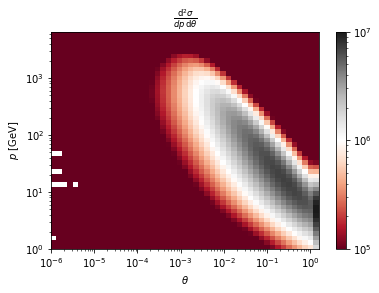

In [11]:
plt.hist2d(b_spectrum[:,1],b_spectrum[:,2],weights=b_spectrum[:,10],
           bins = [theta,p],
           norm=matplotlib.colors.LogNorm(vmin=10**5, vmax=10**7),
           cmap='RdGy');
#           shading='flat', edgecolors='k');
plt.colorbar();
plt.xscale('log');
plt.yscale('log');
# plt.xlim([10**-5,10**-1]);
# plt.ylim([10,5*10**3]);

plt.xlabel(r'$\theta$')
plt.ylabel(r'$p$ [GeV]')
plt.title(r'$\frac{\mathrm{d}^2 \sigma}{dp\, \mathrm{d}\theta}$')
plt.savefig('Plots/diff_xsec.pdf')

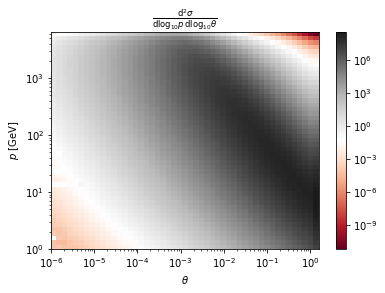

In [12]:
plt.hist2d(b_spectrum[:,1],b_spectrum[:,2],weights=b_spectrum[:,10] * np.log(10) ** 2 * b_spectrum[:,1] * b_spectrum[:,2],
           bins = [theta,p],
           norm=matplotlib.colors.LogNorm(),
           cmap='RdGy');
#           shading='flat', edgecolors='k');
plt.colorbar();
plt.xscale('log');
plt.yscale('log');
# plt.xlim([10**-5,10**-1]);
# plt.ylim([10,5*10**3]);

plt.xlabel(r'$\theta$')
plt.ylabel(r'$p$ [GeV]')
plt.title(r'$\frac{\mathrm{d}^2 \sigma}{\mathrm{d}\log_{10} p\, \mathrm{d} \log_{10} \theta}$');
# plt.savefig('Plots/diff_xsec.pdf')

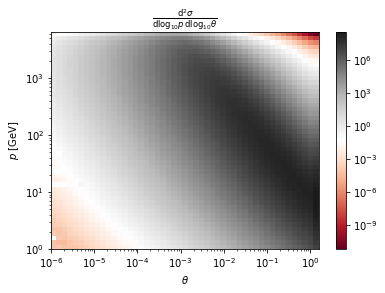

In [13]:
hs = plt.hist2d(b_spectrum[:,1],b_spectrum[:,2],weights=b_spectrum[:,11],
                bins = [theta,p],
                norm=matplotlib.colors.LogNorm(),
                cmap='RdGy');
#           shading='flat', edgecolors='k');
plt.colorbar();
plt.xscale('log');
plt.yscale('log');
# plt.xlim([10**-5,10**-1]);
# plt.ylim([10,5*10**3]);

plt.xlabel(r'$\theta$')
plt.ylabel(r'$p$ [GeV]')
plt.title(r'$\frac{\mathrm{d}^2 \sigma}{\mathrm{d}\log_{10} p\, \mathrm{d} \log_{10} \theta}$')
plt.savefig('Plots/diff_xsec_log.pdf')

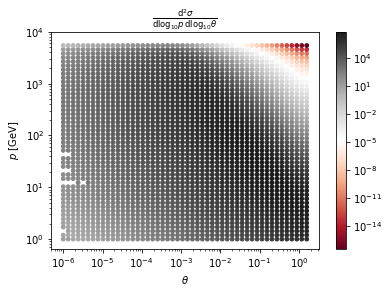

In [14]:
plt.scatter(b_spectrum[:,1],b_spectrum[:,2], c=b_spectrum[:,10], s=14,norm=matplotlib.colors.LogNorm(), cmap='RdGy');
plt.colorbar();
plt.xscale('log');
plt.yscale('log');
plt.xlabel(r'$\theta$');
plt.ylabel(r'$p$ [GeV]');
plt.title(r'$\frac{\mathrm{d}^2 \sigma}{\mathrm{d}\log_{10} p\, \mathrm{d} \log_{10} \theta}$');

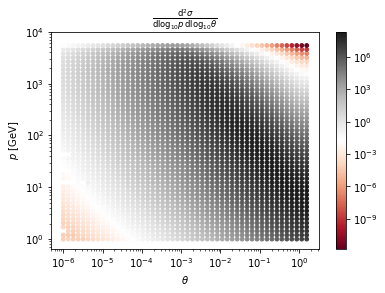

In [15]:
plt.scatter(b_spectrum[:,1],b_spectrum[:,2], c=b_spectrum[:,11], s=14,norm=matplotlib.colors.LogNorm(), cmap='RdGy');
plt.colorbar();
plt.xscale('log');
plt.yscale('log');
plt.xlabel(r'$\theta$');
plt.ylabel(r'$p$ [GeV]');
plt.title(r'$\frac{\mathrm{d}^2 \sigma}{\mathrm{d} \log_{10} p\, \mathrm{d} \log_{10} \theta}$');

/tmp/ipykernel_240228/137461922.py:2: RuntimeWarning: divide by zero encountered in log10
  zz = np.log10(b_spectrum[:,11] * 10 ** 6 * 3)
/tmp/ipykernel_240228/137461922.py:2: RuntimeWarning: invalid value encountered in log10
  zz = np.log10(b_spectrum[:,11] * 10 ** 6 * 3)


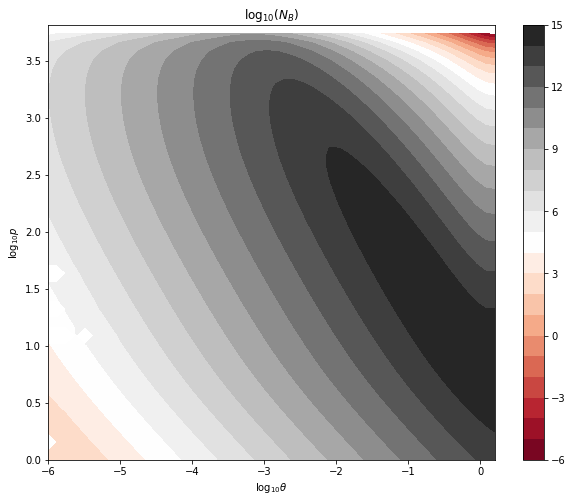

In [16]:
xx,yy = np.meshgrid(np.log10(theta), np.log10(p))
zz = np.log10(b_spectrum[:,11] * 10 ** 6 * 3)
zz = np.reshape(zz, xx.shape)

fig = plt.figure(figsize=(10,8))

plt.contourf(xx,yy,zz, 20, cmap='RdGy')
plt.title(r"$\log_{10}\left( N_B \right)$")
plt.xlabel(r"$\log_{10}\theta$")
plt.ylabel(r"$\log_{10}p$")
plt.show
plt.colorbar();

In [17]:
theta_full = b_spectrum[:,1]
p_full     = b_spectrum[:,2]
dxsec_dlogtheta_dlogp = b_spectrum[:,11]

# Cut on theta
theta_mask = theta_full > 10 ** -4 # Set xsec above a given angle to zero
dxsec_dlogtheta_dlogp[theta_mask] = 0

# Cut on p
p_mask     = p_full < 10 ** 2 # Set xsec below a given energy to zero
dxsec_dlogtheta_dlogp[p_mask] = 0

log10theta,log10p = np.log10(theta), np.log10(p)
dxsec_dlogtheta_dlogp = np.reshape(dxsec_dlogtheta_dlogp, (np.size(log10theta),np.size(log10p)))

dxsec_dlogp = integrate.simpson(dxsec_dlogtheta_dlogp, log10theta)
xsec = integrate.simpson(dxsec_dlogp, log10p)

In [18]:
xsec # pb

4789.575879576112

The pp-inelastic x-section at 13TeV is  σinel ∼ 75 mb. At 3ab^-1 this implies

2*10^(17) pp collision events !!

At these events, pions, etas, and kaon are produced giving roughly
Nπ0 ~ NK ~ 10^18, 
Nη ≈ 2.5 × 10^17, 

For heavy flavor, the state of the art production calculation is FONLL, which gives
ND ~ 10^16 
NB ≈ 10^15

In [19]:
N_B = xsec * 10**6 * 3

In [20]:
print(N_B)

14368727638.728336


In [21]:
np.log10(N_B)

10.157418312744928

In [22]:
def z_boost(gam):
    betagam = np.sqrt(gam**2 - 1)
    mat = [[gam, 0, 0, betagam],
           [0, 1, 0, 0],
           [0, 0, 1, 0],
           [betagam, 0, 0, gam]]
    return np.array(mat)

def z_rot(theta):
    c = np.cos(theta)
    s = np.sin(theta)
    mat = [[1, 0, 0, 0],
           [0, 1, 0, 0],
           [0, 0, c, -s],
           [0, 0, s, c]]
    return np.array(mat)

def rest_momentum(m_H, m_X, m_2=0, theta=0, phi=0):
    
    # From PDG on 2-body decay
    sigma = m_X ** 2 + m_2 ** 2
    delta = m_X ** 2 - m_2 ** 2
    pt = (m_H ** 4 - 2 * m_H ** 2 * sigma + delta ** 2) ** (1/2) / (2 * m_H)
    E  = (pt ** 2 + m_X ** 2) ** (1/2)
    px = pt * np.sin(theta) * np.sin(phi)
    py = pt * np.sin(theta) * np.cos(phi)
    pz = pt * np.cos(theta)
    
    return np.array([E,px,py,pz])

def extract_spherical(p):
    p = p[1:]
    n = p / np.dot(p.T,p)
    if n[1] == 0:
        phi = np.sign(n[0])*np.pi/2
    else:
        phi = np.arctan(n[0]/n[1])
    if n[2] == 0:
        theta = np.pi/2
    else:
        theta = np.arctan(np.sqrt(n[0]**2+n[1]**2)/n[2])
    theta = theta * np.sign(n[2])
    return theta, phi

def xy_at_FASER(theta, p, L, m_X, theta2=0, phi2=0, m_2=0):
    d = c * tau_B * p / m_B
    l = L - d * np.cos(theta) # Distance to travel to FASER at decay
    y = d * np.sin(theta) # y-displacement of decay point
    
    p_rest = rest_momentum(m_B, m_X, m_2, theta=theta2, phi=phi2)
    p_boost = np.dot(z_rot(-theta),np.dot(z_boost(p/m_B),p_rest))
    theta2, phi2 = extract_spherical(p_boost)
    
    x = l * np.tan(theta2) * np.cos(phi2)
    y = y + l * np.tan(theta2) * np.sin(phi2)
    return x, y

In [23]:
thetas_rest = np.pi * np.logspace(-6, -0.1, 200)
p = 1000
theta_init = 10 ** -4
m_X = m_b/2
# phi_samples = [np.pi/2, np.pi/4, 0, -np.pi/4, -np.pi/2]
# phi_samples_strs = ['$\pi / 2$', '$\pi / 4$', '$0$', '$-\pi / 4$', '$-\pi / 2$']

phi_samples = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
phi_samples_strs = ['$0$', '$\pi / 4$', '$\pi / 2$', '$3\pi / 4$', '$\pi$']

xs_sets = []
ys_sets = []
thetas_sets = []
phis_sets = []

for phi_sampled in phi_samples:
    xs = []
    ys = []
    thetas = []
    phis = []
    for theta in thetas_rest:
        p_rest = rest_momentum(m_B, m_X, 0, theta=theta, phi=phi_sampled)
        p_boost = np.dot(z_rot(-theta_init),np.dot(z_boost(p/m_B),p_rest))
        theta2, phi2 = extract_spherical(p_boost)

        x, y = xy_at_FASER(theta_init, p, L_FASER, m_X,
                           theta2=theta, phi2=phi_sampled)
        xs.append(x)
        ys.append(y)
        thetas.append(theta2)
        phis.append(phi2)
    xs = np.array(xs)  
    ys = np.array(ys)  
    thetas = np.array(thetas)  
    phis = np.array(phis)
    xs_sets.append(xs)
    ys_sets.append(ys)
    thetas_sets.append(thetas)
    phis_sets.append(phis)

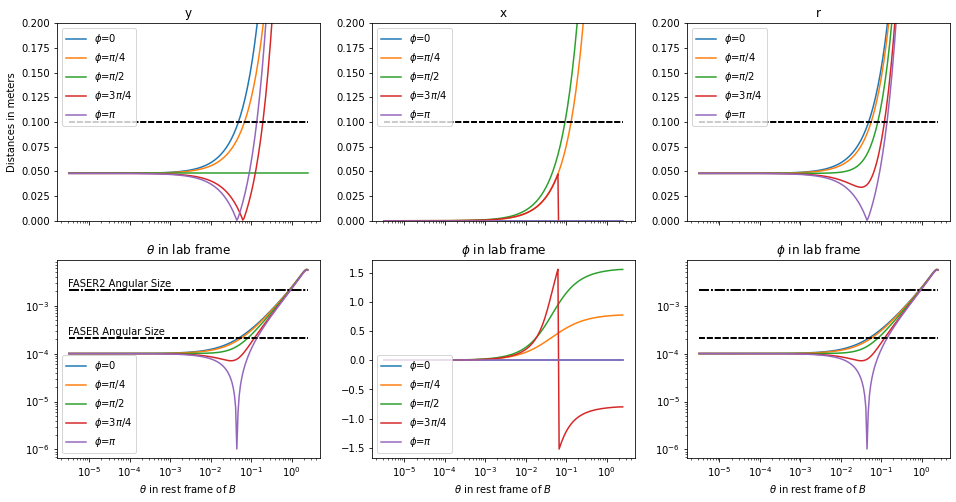

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=False, figsize=(16,8))

ax[0,0].set_title('y')
ax[0,1].set_title('x')
ax[0,2].set_title('r')
ax[1,0].set_title('$\\theta$ in lab frame')
ax[1,1].set_title('$\phi$ in lab frame')
ax[1,2].set_title('$\phi$ in lab frame')
for (xs, ys, thetas, phis, phi_sampled) in zip(xs_sets, ys_sets, thetas_sets, phis_sets, phi_samples_strs):
    ax[0,0].plot(thetas_rest, xs, label='$\phi$=' + str(phi_sampled));
    ax[0,0].plot(thetas_rest, 0.1*np.ones(np.shape(thetas_rest)), 'k--');
    ax[0,0].legend(loc='upper left');
    ax[0,1].plot(thetas_rest, ys, label='$\phi$=' + str(phi_sampled));
    ax[0,1].plot(thetas_rest, 0.1*np.ones(np.shape(thetas_rest)), 'k--');
    ax[0,1].legend(loc='upper left');
    ax[0,2].plot(thetas_rest, np.sqrt(xs ** 2 + ys ** 2), label='$\phi$=' + str(phi_sampled));
    ax[0,2].plot(thetas_rest, 0.1*np.ones(np.shape(thetas_rest)), 'k--');
    ax[0,2].legend(loc='upper left');
    ax[1,0].plot(thetas_rest, thetas, label='$\phi$=' + str(phi_sampled));
    ax[1,0].plot(thetas_rest, 0.1/L_FASER*np.ones(np.shape(thetas_rest)), 'k--');
    ax[1,0].plot(thetas_rest, 1/L_FASER2*np.ones(np.shape(thetas_rest)), 'k-.');
    ax[1,0].set_yscale('log')
    ax[1,0].legend(loc='lower left');
    ax[1,1].plot(thetas_rest, phis, label='$\phi$=' + str(phi_sampled));
    ax[1,1].legend(loc='lower left');
    ax[1,2].plot(thetas_rest, thetas, label='$\phi$=' + str(phi_sampled));
    ax[1,2].plot(thetas_rest, 0.1/L_FASER*np.ones(np.shape(thetas_rest)), 'k--');
    ax[1,2].plot(thetas_rest, 1/L_FASER2*np.ones(np.shape(thetas_rest)), 'k-.');
    ax[1,2].set_yscale('log')

ax[1,0].annotate('FASER Angular Size' , (3*10**-6,0.12/L_FASER))
ax[1,0].annotate('FASER2 Angular Size', (3*10**-6,1.2/L_FASER2))

for a in ax[0,:]:
    a.set_ylim([0,0.2])
#     a.set_yscale('log')
ax[0,0].set_ylabel('Distances in meters')
for a in ax[1,:]:
    a.set_xlabel('$\\theta$ in rest frame of $B$')
plt.xscale('log')

In [25]:
thetas_rest = np.pi * np.logspace(-6, 0, 200)
phis_rest = 2*np.pi* np.linspace(0, 1, 200)

radii = []
for theta in thetas_rest:
    radii_tmp = []
    for phi in phis_rest:
        x, y = xy_at_FASER(10**-4, 1000, 480, m_B/2,
                           theta2=theta, phi2=phi)
        R2 = x ** 2 + y ** 2
        radii_tmp.append(np.sqrt(R2))
    radii.append(radii_tmp)
radii = np.array(radii)  

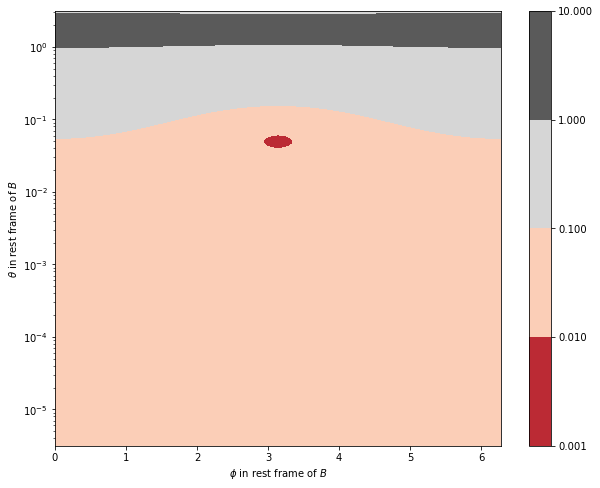

In [26]:
xx,yy = np.meshgrid(phis_rest,thetas_rest)
zz = radii

fig = plt.figure(figsize=(10,8))

plt.contourf(xx,yy,zz, 20,
             cmap='RdGy',
             norm=matplotlib.colors.LogNorm())
# plt.xscale('log')
plt.yscale('log')
plt.show
plt.colorbar();

plt.xlabel('$\phi$ in rest frame of $B$');
plt.ylabel('$\\theta$ in rest frame of $B$');

In [27]:
accepted = radii < 0.1

log10_thetas_rest = np.log10(thetas_rest)
cuts = [cut for cut in accepted]
normalized = []
for (cut, theta) in zip(cuts, thetas_rest):
    cut = cut * np.sin(theta) * np.log(10) * theta
    normalized.append(cut)
normalized = np.array(normalized) / (4 * np.pi)


acceptance_phi = integrate.simpson(normalized, phis_rest)
acceptance = integrate.simpson(acceptance_phi, log10_thetas_rest)

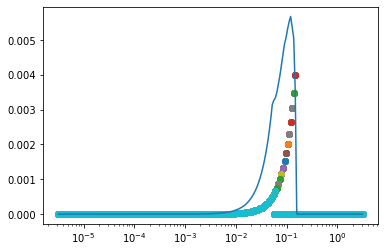

In [28]:
[plt.scatter(thetas_rest,cut) for cut in normalized.T]
plt.plot(thetas_rest,acceptance_phi)
plt.xscale('log')

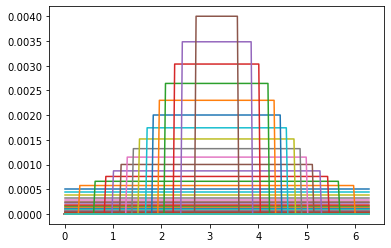

In [29]:
for cut in normalized:
    plt.plot(phis_rest, cut)
# plt.xscale('log')

/tmp/ipykernel_240228/3513673742.py:11: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx,yy,normalized, 20,


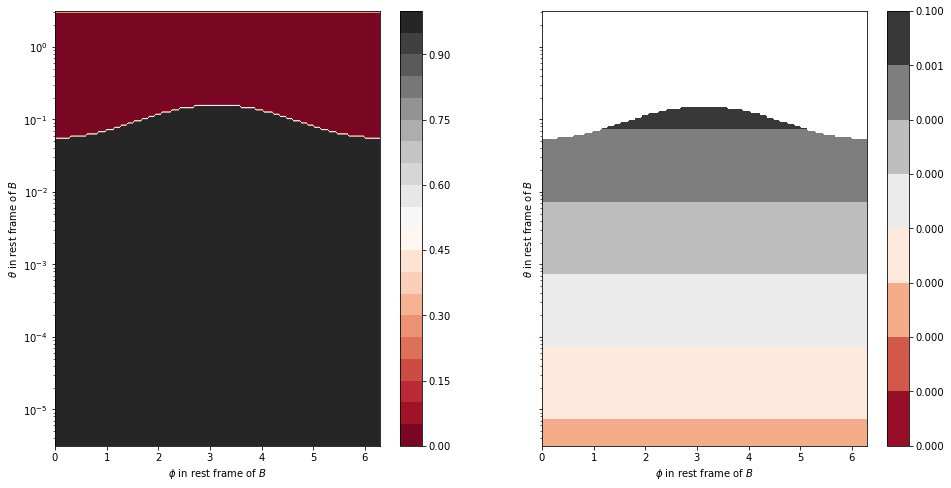

In [30]:
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(16,8))

plt.sca(ax[0])
plt.contourf(xx,yy,accepted, 20,
             cmap='RdGy')
# plt.xscale('log')
plt.yscale('log')
plt.colorbar()

plt.sca(ax[1])
plt.contourf(xx,yy,normalized, 20,
             cmap='RdGy',
             norm=matplotlib.colors.LogNorm())
# plt.xscale('log')
plt.yscale('log')
plt.colorbar()

for a in ax:
    a.set_xlabel('$\phi$ in rest frame of $B$');
    a.set_ylabel('$\\theta$ in rest frame of $B$');

In [31]:
def calc_prob(p, theta_init, L, R, m_X, m_2=0):
    thetas_rest = np.pi * np.logspace(-6, 0, 200)
    phis_rest = 2*np.pi* np.linspace(0, 1, 200)

    radii = []
    for theta in thetas_rest:
        radii_tmp = []
        for phi in phis_rest:
            x, y = xy_at_FASER(theta_init, p, L, m_X, m_2=m_2,
                               theta2=theta, phi2=phi)
            R2 = x ** 2 + y ** 2
            radii_tmp.append(np.sqrt(R2))
        radii.append(radii_tmp)
    radii = np.array(radii) 
    
    accepted = radii < R

    log10_thetas_rest = np.log10(thetas_rest)
    cuts = [cut for cut in accepted]
    normalized = []
    for (cut, theta) in zip(cuts, thetas_rest):
        cut = cut * np.sin(theta) * np.log(10) * theta
        normalized.append(cut)
    normalized = np.array(normalized) / (4 * np.pi)


    acceptance_phi = integrate.simpson(normalized, phis_rest)
    acceptance = integrate.simpson(acceptance_phi, log10_thetas_rest)
    
    return acceptance

In [ ]:
thetas = np.sort(list(set(b_spectrum[:,1])))
ps     = np.sort(list(set(b_spectrum[:,2])))

acceptance_FASER = []
acceptance_FASER2 = []
for p in ps:
    acceptance_tmp = []
    acceptance_tmp2 = []
    for theta in thetas:
        prob_FASER  = calc_prob(p, theta, L=L_FASER, R=R_FASER, m_X=1.2)
        prob_FASER2 = calc_prob(p, theta, L=L_FASER2, R=R_FASER2, m_X=1.2)
        
        acceptance_tmp.append(prob_FASER)
        acceptance_tmp2.append(prob_FASER2)
    acceptance_FASER.append(acceptance_tmp)
    acceptance_FASER2.append(acceptance_tmp2)
acceptance_FASER  = np.array(acceptance_FASER)   
acceptance_FASER2 = np.array(acceptance_FASER2)

/tmp/ipykernel_240228/1805396382.py:2: RuntimeWarning: invalid value encountered in sqrt
  betagam = np.sqrt(gam**2 - 1)


In [ ]:
xx,yy = np.meshgrid(thetas,ps)
zz = acceptance_FASER2

fig = plt.figure(figsize=(10,8))

plt.contourf(xx,yy,zz, 20,
             cmap='RdGy',
             norm=matplotlib.colors.LogNorm())
plt.xscale('log')
plt.yscale('log')
plt.show
plt.colorbar();

plt.xlabel('$\\theta$');
plt.ylabel('$p$ [GeV]');

In [ ]:
xx,yy = np.meshgrid(thetas,ps)
dNb_dloglog = b_spectrum[:,10] * 10 ** 6 * 3 / 20
zz = np.reshape(dNb_dloglog, xx.shape)
zz = zz * acceptance_FASER

fig = plt.figure(figsize=(10,8))

plt.contourf(xx,yy,zz, 20, cmap='RdGy',norm=matplotlib.colors.LogNorm())
plt.xscale('log')
plt.yscale('log')
plt.title(r"$N_X$")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p$")
plt.show
plt.colorbar();

In [ ]:
xx,yy = np.meshgrid(thetas,ps)
dNb_dloglog = b_spectrum[:,10] * 10 ** 6 * 3
zz = np.reshape(dNb_dloglog, xx.shape)
zz = zz * acceptance_FASER2

fig = plt.figure(figsize=(10,8))

plt.contourf(xx,yy,zz, 20, cmap='RdGy',norm=matplotlib.colors.LogNorm())
plt.xscale('log')
plt.yscale('log')
plt.title(r"$N_X$")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p$")
plt.show
plt.colorbar();

In [ ]:
N_X_FASER_ps = integrate.simpson(np.reshape(dNb_dloglog, xx.shape)*acceptance_FASER.T / 20, np.log10(thetas))
N_X_FASER = integrate.simpson(N_X_FASER_ps, ps)

N_X_FASER2_ps = integrate.simpson(np.reshape(dNb_dloglog, xx.shape)*acceptance_FASER2.T, np.log10(thetas))
N_X_FASER2 = integrate.simpson(N_X_FASER2_ps, ps)

In [ ]:
print(np.log10(N_X_FASER), np.log10(N_X_FASER2))

In [ ]:
p_X   = 10**3 # GeV

# Probability to decay in FASER
#    x = (m/p) * (L/ct)
#    missing factor of Delta / L
prob = lambda x : x * np.exp(-x)

ctaus = np.logspace(-3,8,500)
# Make nice axes for plotting
# fig = plt.figure(figsize=(8,6))
fig, axs = plt.subplots(2,2,sharex=True, sharey=True, gridspec_kw={'wspace' : 0.05, 'hspace' : 0.15}, figsize=(24,12));

m_Xs = [float(m_X) for m_X in B_constr.keys()]
m_Xs = np.sort(m_Xs)
for (m_X, ax) in zip(m_Xs,axs.reshape(np.size(axs),)):

    # Calculate ctau vs Br line and plot for each Hadron
    for meson in meson_dict:
        if meson == '$B_0$':
            Br  = meson_dict[meson]['Br']

            probs = prob( (m_X / p_X) * (L_FASER / ctaus) )
        #     probs = prob(L/ctaus)
            mask = probs > 10 ** -10
            Br_mins = (L_FASER / Delta_FASER) / (N_X_FASER) * ( 3 * probs[mask] ** -1 )
            mask_br = Br_mins < Br

    #         plt.plot(ctaus[mask], Br_mins, '--', color = color)
    #         plt.plot(ctaus[mask][mask_br], Br_mins[mask_br], color = color, label = 'FASER Reach')
            ax.plot(ctaus[mask], Br_mins, label = 'FASER')

            Br_mins = (L_FASER2 / Delta_FASER2) / (N_X_FASER2) * ( 3 * probs[mask] ** -1 )
            mask_br = Br_mins < Br

    #         plt.plot(ctaus[mask], Br_mins, '--', color = 'blue')
    #         plt.plot(ctaus[mask][mask_br], Br_mins[mask_br], color = 'blue', label = 'FASER2 Reach')        
            ax.plot(ctaus[mask], Br_mins, color = 'blue', label = 'FASER2')

    for exp in sorted(B_constr[str(m_X)].keys()):
        energies = B_constr[str(m_X)][exp]['E']
        bounds   = B_constr[str(m_X)][exp]['Br']
        
        ax.plot(energies, bounds, label=exp)
        
    if m_X == 1.2:
        xlo = np.log10(0.00003505313686224187)
        xhi = np.log10(0.3)
        x = np.logspace(xlo, xhi)
#         LHCb_2015 = np.exp(-16.0285 - 0.597414 * np.log(x) ** 2 - 0.239592 * np.log(x) ** 3 - 
#           0.0535686 * np.log(x) ** 4 - 0.00696911 * np.log(x) ** 5 - 0.000462062 * np.log(x) ** 6 - 
#           0.000011902 * np.log(x) ** 7) * x ** 0.228806
#         ax.plot(x, LHCb_2015, label='LHCb 1508.04094')

        LHCb_2016 = np.exp(-17.7825 - 2.03224 * np.log(x) ** 2 - 0.877746 * np.log(x) ** 3 - 
         0.202081 * np.log(x) ** 4 - 0.0256459 * np.log(x) ** 5 - 0.00164878 * np.log(x) ** 6 - 
         0.0000416377 * np.log(x) ** 7) / (x ** 1.18973)
        ax.plot(x, LHCb_2016, label='LHCb') # '1612.07818')

    # Line for Dark Higgs via mixing
    thetas = np.logspace(-8,0,200)
    gammas = m_mu ** 2 * m_X / (8 * np.pi * v ** 2) * (1 - 4 * m_mu ** 2 / m_X ** 2) ** (3/2) * thetas ** 2
    ctaus = c * hbar / gammas
    branches = 5.7 * (1 - m_mu ** 2 / m_X ** 2) ** 2 * thetas ** 2 * 10 ** -2
    ax.plot(ctaus, branches, 'k--', label = 'Dark Higgs Mixing')


    # # Fading backgrounds for main detector and BBN
    # for N in range(0, 5):
    #     x = 1.5**N
    #     plt.fill_between([0,x*10],[1,1], color='b', alpha=0.01)
    #     plt.fill_between([10**7*x, 10**9],[1,1], color='r', alpha=0.01)
    ax.set_xlim([10**-3, 10**3])
    # plt.xlim([0.5, 2.5])
    ax.set_ylim([10**-14, 10**-4])
    if any(ax == axs[1]):
        ax.set_xlabel('$c\\tau~[m]$')
    if any(ax == axs[:,0]):
        ax.set_ylabel('Br($B\\rightarrow X_s + X) \\times \mathrm{Br}(X\\rightarrow \mu^+\mu^-$)')
    ax.set_title('$m_X=$' + str(m_X) + ' GeV')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(loc='lower left', frameon=False);

# fig.savefig('Plots/FASER_comparison.pdf')

In [ ]:
x_data = np.loadnpy('Spectra/x_geo_b_' + str(m_KL) + '.npy', allow_pickle=True)

In [4]:
b_spectrum = np.genfromtxt('Spectra/bbbar_spectrum.csv',
                                delimiter=',',skip_header=1)
    
thetas = np.sort(list(set(b_spectrum[:,1])))
ps     = np.sort(list(set(b_spectrum[:,2])))

In [ ]:
m_X = 0.3
m_Y = m_KL
x_geo = np.load('Spectra/x_geo_b_mX_' + str(m_X) + '_mY_' + str(m_Y) + '.npy', allow_pickle=True)

In [ ]:
theta = thetas[20]
p = ps[20]

tmp = [x for x in x_geo if x['p_H'] == p and x['theta_H'] == theta]

In [ ]:
tmp